In [160]:
import os

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import random

import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array

In [161]:
train_path = "train/train/"
test_path = "test/test/"

In [162]:
import pathlib

data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


Plotting grid of fruits in training dataset

In [163]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 100)
  img = mpimg.imread(target_folder + "/" + random_image[0])

  print(img)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  return img

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

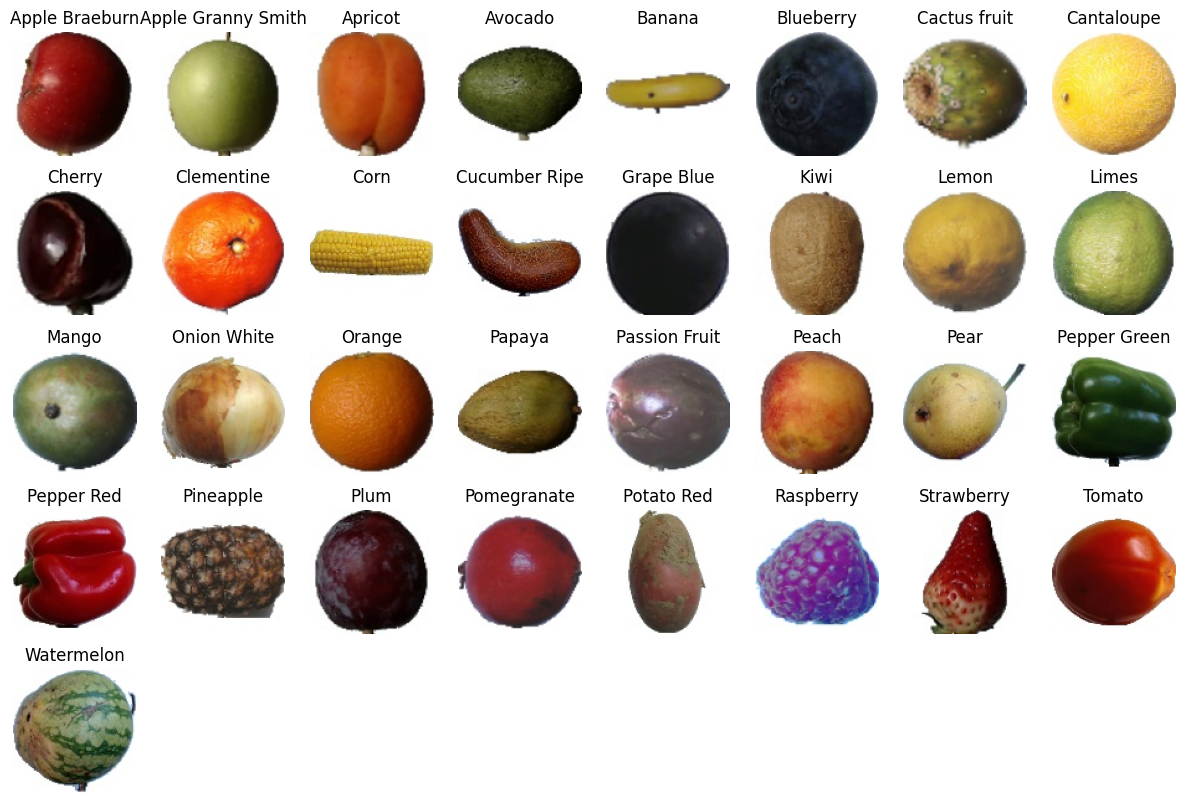

In [164]:
plt.figure(figsize = (15,10))

for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

Creating a dataframe for next steps

In [165]:
train_validation_data = {"path" : [],
                         "filename": [],
                         "label" : [],
}

for dirPath, dirNames, filenames in os.walk(train_path):
    for f in filenames:
        train_validation_data["path"].append(dirPath)
        train_validation_data["filename"].append(f)
        train_validation_data["label"].append(f.split("_")[0])

In [166]:
train_val_data_df = pd.DataFrame(train_validation_data)
train_val_data_df.head()

,path,filename,label
0,train/train/Apple Braeburn,Apple Braeburn_0.jpg,Apple Braeburn
1,train/train/Apple Braeburn,Apple Braeburn_1.jpg,Apple Braeburn
2,train/train/Apple Braeburn,Apple Braeburn_10.jpg,Apple Braeburn
3,train/train/Apple Braeburn,Apple Braeburn_100.jpg,Apple Braeburn
4,train/train/Apple Braeburn,Apple Braeburn_101.jpg,Apple Braeburn


In [167]:
test_data = {'path' : [],
       'filename': []}
for dirPath, dirNames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirPath)
        test_data['filename'].append(f)

In [168]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,test/test/,0000.jpg
1,test/test/,0001.jpg
2,test/test/,0002.jpg
3,test/test/,0003.jpg
4,test/test/,0004.jpg


Play with images and create a numpy array

In [169]:
images = []
label = []

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [170]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [171]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))

test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


Encodeing

In [172]:
class_indx = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indx.get, labels))

label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')

Next step is data splitting

In [173]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20,
                                                            stratify=label_categorical,
                                                            random_state=40, shuffle = True)

In [174]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 33)


In [175]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [176]:
print (training_data.element_spec)
print (validation_data.element_spec)

# create an iterator and turn them into numpy array

train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [177]:
train_iter_im, train_iter_label = next(iter(training_data))
print(train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


In [178]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


In [179]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

13483 (array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[253., 255., 252.],
        [254., 254., 252.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

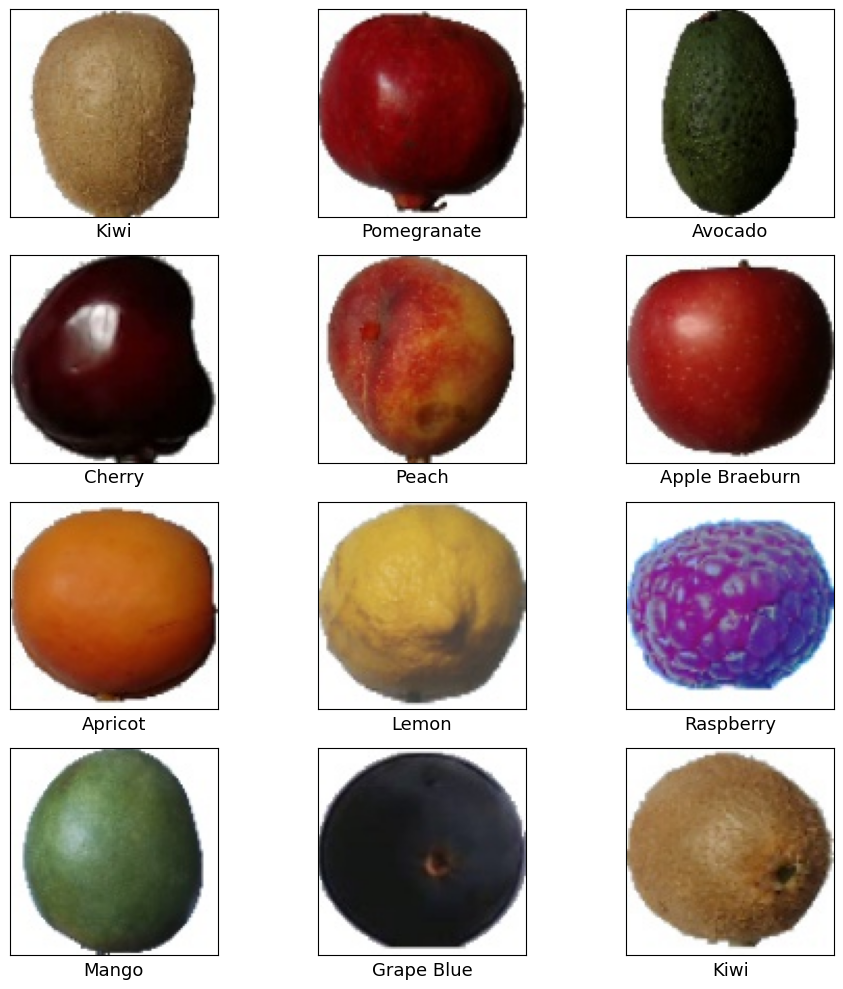

In [180]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()
plt.show()

In [181]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])


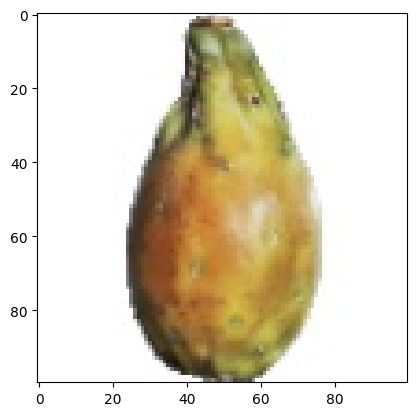

In [182]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [183]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    #batch the data
    ds = ds.batch(BATCH_SIZE)

    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [184]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

In [185]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5,
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [186]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 49, 49, 5)         0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 12005)             0         
                                                                 
 dense_11 (Dense)            (None, 33)                396198    
                                                                 
Total params: 396338 (1.51 MB)
Trainable params: 396338 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
history_1 = model_1.fit(train_ds,
                       epochs =5,
                       validation_data= val_ds)

Epoch 1/5
106/106 [==============================] - 23s 203ms/step - loss: 1.1486 - accuracy: 0.7105 - val_loss: 0.2382 - val_accuracy: 0.9537
Epoch 2/5
106/106 [==============================] - 20s 183ms/step - loss: 0.1657 - accuracy: 0.9635 - val_loss: 0.0929 - val_accuracy: 0.9852
Epoch 3/5
106/106 [==============================] - 18s 168ms/step - loss: 0.0612 - accuracy: 0.9904 - val_loss: 0.0428 - val_accuracy: 0.9956
Epoch 4/5
106/106 [==============================] - 18s 171ms/step - loss: 0.0299 - accuracy: 0.9967 - val_loss: 0.0267 - val_accuracy: 0.9970
Epoch 5/5
106/106 [==============================] - 18s 171ms/step - loss: 0.0290 - accuracy: 0.9948 - val_loss: 0.0647 - val_accuracy: 0.9783


In [188]:
model_1.evaluate(val_ds)

27/27 [==============================] - 1s 39ms/step - loss: 0.0647 - accuracy: 0.9783


[0.06471666693687439, 0.9783446788787842]

<Axes: >

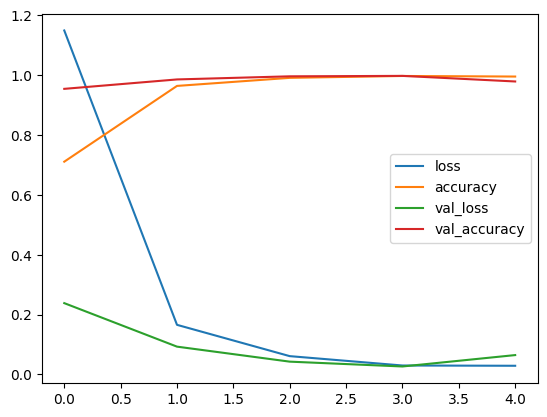

In [189]:
pd.DataFrame(history_1.history).plot()

In [190]:
y_pred = model_1.predict(val_ds)

27/27 [==============================] - 1s 41ms/step


In [191]:
y_pred[:1]

array([[9.1264352e-10, 3.9354832e-06, 2.7347602e-10, 7.6130673e-04,
        6.8586710e-04, 2.7805834e-13, 2.6231613e-05, 3.0655153e-10,
        2.7455428e-13, 2.9301755e-11, 8.3040028e-08, 8.6227461e-05,
        2.8234992e-09, 1.3623345e-03, 2.6358739e-06, 9.7520908e-11,
        9.0223806e-10, 1.9136318e-05, 2.4719704e-13, 9.9380374e-01,
        7.1949404e-07, 2.8022163e-07, 3.2909185e-05, 6.9673725e-09,
        2.4160263e-08, 1.6968863e-09, 6.2358350e-09, 5.3323532e-07,
        9.2154939e-04, 4.6329856e-08, 2.2921574e-03, 7.9500113e-09,
        3.2989377e-07]], dtype=float32)

In [192]:
y_pred.shape

(3371, 33)

In [193]:
y_pred = tf.argmax(y_pred, axis=1)

In [194]:
y_true = np.argmax(valid_lab, axis=1)

In [195]:
y_true, y_pred

(array([19, 12, 12, ..., 32,  6, 22], dtype=int64),
 <tf.Tensor: shape=(3371,), dtype=int64, numpy=array([19, 12, 12, ..., 32,  6, 22], dtype=int64)>)

In [196]:
len(y_pred), len(y_true)

(3371, 3371)

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 99,   0,   0, ...,   0,   0,   0],
       [  0,  99,   0, ...,   0,   0,   0],
       [  0,   0,  99, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  98,   0,   0],
       [  0,   0,   0, ...,   0, 148,   0],
       [  0,   2,   0, ...,   0,   0,  93]], dtype=int64)

<Axes: >

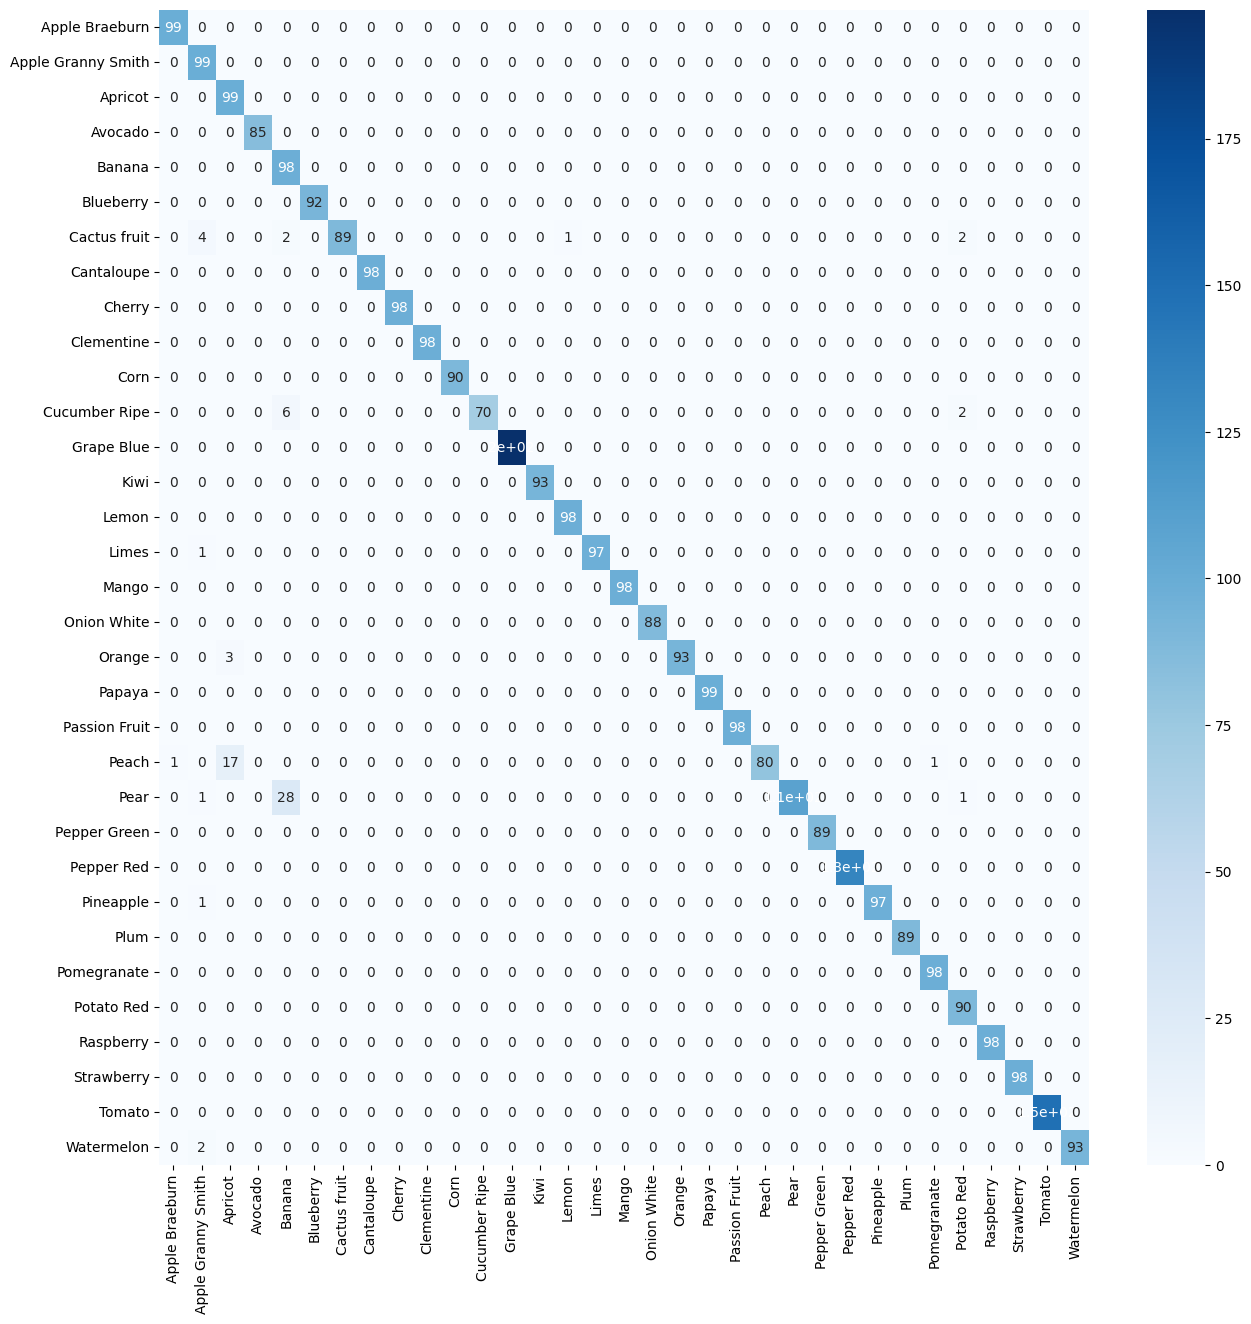

In [198]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm, index= class_names, columns = class_names), annot = True, cmap="Blues")

In [199]:
predictions = model_1.predict(test_ds)

45/45 [==============================] - 3s 46ms/step


In [200]:
predictions = class_names[tf.argmax(predictions, axis=1)] # Get classes
predictions[:5]

array(['Apricot', 'Grape Blue', 'Mango', 'Grape Blue', 'Mango'],
      dtype='<U18')

In [201]:
predictions.shape

(5641,)

In [202]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head(2)

,id,label
0,0,Apple Braeburn
1,1,Apple Braeburn


In [203]:
test_data_df.head()

,path,filename
0,test/test/,0000.jpg
1,test/test/,0001.jpg
2,test/test/,0002.jpg
3,test/test/,0003.jpg
4,test/test/,0004.jpg


In [204]:
submission['id'] = test_data_df['filename']
submission['label'] = predictions

In [205]:
submission.head()

,id,label
0,0000.jpg,Apricot
1,0001.jpg,Grape Blue
2,0002.jpg,Mango
3,0003.jpg,Grape Blue
4,0004.jpg,Mango


In [206]:
submission.to_csv("submission.csv",index=False)